In [208]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from general_mm import GeneralizedMixtureModel, ModuledDistribution
import torch
from torch import nn
from torch.distributions import MultivariateNormal
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

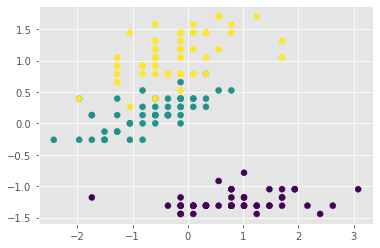

In [255]:
from sklearn.datasets import load_wine

dataset = load_iris()
print(dataset)

learn_data = torch.tensor(dataset.data).to(torch.float32)
learn_data = (learn_data - learn_data.mean(dim=0)) / learn_data.std(dim=0)
plt.scatter(learn_data[:, 1], learn_data[:, 3], c=dataset.target)

In [259]:
cluster_num = 3

parameters = [{"loc": nn.Parameter(torch.randn(learn_data.shape[1])), "scale_tril": nn.Parameter(torch.eye(learn_data.shape[1]))} for k in range(cluster_num)]
distributions = [ModuledDistribution(MultivariateNormal(**parameters[k]),
                                     parameters[k])
                 for k in range(cluster_num)]
model = GeneralizedMixtureModel(distributions, rtol=1e-6, learning_rate=0.01)

In [260]:
model.fit(learn_data)

  3%|▎         | 34/1000 [00:12<05:48,  2.77it/s, log_prob=tensor(-288.5232)]


tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])


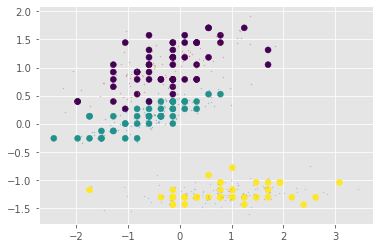

In [261]:
predicted = model.predict(learn_data)
color = predicted.argmax(dim=0)
print(color)
plt.scatter(learn_data[:, 1], learn_data[:, 3], c=color)
for k in range(cluster_num):
    sample = distributions[k].sample([100])[:, (1, 3)]
    plt.scatter(sample[:, 0], sample[:, 1], s=1., alpha=0.3)

In [254]:
print(distributions[1].parameter["loc"])

Parameter containing:
tensor([-0.5355, -0.0696, -0.6312, -0.0234, -0.2361, -0.2550, -0.2611, -0.1410,
        -0.3648, -0.2604, -0.2693, -0.2081, -0.5890], requires_grad=True)


In [246]:
print(model.cluster_ratio)

tensor([0.3281, 0.4013, 0.2706])
